## Problem 1
---

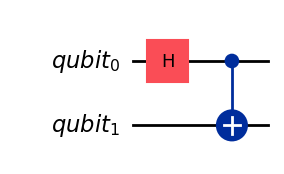

In [29]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

qubits = QuantumRegister(2, "qubit")

bell_circuit = QuantumCircuit(qubits) # only including qubits right now

bell_circuit.h(0)
bell_circuit.cx(0, 1)

bell_circuit.draw('mpl')

Both qubits in `QuantumCircuit()` begin by default in the state $|0\rangle$. Therefore the two-qubit state we begin with is $|00\rangle$. Applying the bell circuit defined above transforms $|00\rangle \rightarrow |\phi^+\rangle$ 

In [16]:
zerozero = Statevector.from_label("0").tensor(Statevector.from_label("0"))

zerozero.evolve(bell_circuit).draw("latex")

<IPython.core.display.Latex object>

Now let's add the measurement gates to map the measurement results of both qubits onto two separate classical bits

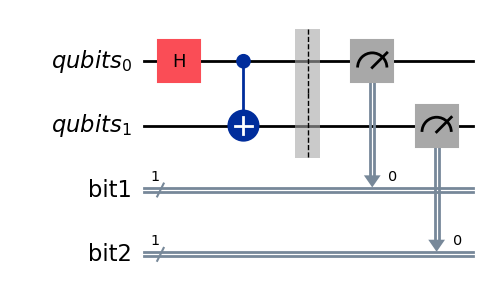

In [95]:
bit1 = ClassicalRegister(1, "bit1")
bit2 = ClassicalRegister(1, "bit2")

circuit = QuantumCircuit(qubits, bit1, bit2)
circuit = circuit.compose(bell_circuit)
circuit.barrier()

circuit.measure(qubits[0], bit1)
circuit.measure(qubits[1], bit2)

circuit.draw('mpl')

Let's run `AerSimulator()` and display a histogram of the measurement results

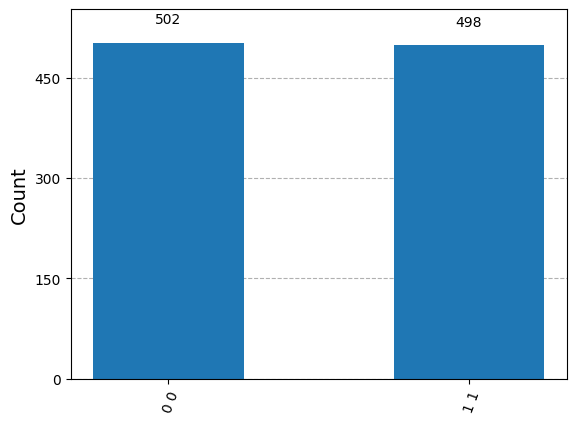

In [109]:
job = AerSimulator().run(circuit, shots = 1000) # 1000 samples
results = job.result()
statistics = results.get_counts()

plot_histogram(statistics)

We see a perfect 50/50 probabilitiy of yielding the classical measurements `00` or `11`.
This is expected from the $|\phi^+\rangle$ state. 

## Problem 2
---

We initialize a 2-qubit circuit as follows: 

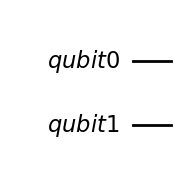

In [127]:
qubit0 = QuantumRegister(1, "qubit0")
qubit1 = QuantumRegister(1, "qubit1")

circuit = QuantumCircuit(qubit0, qubit1)
circuit.draw('mpl')

Now let's generate a random unitary gate using `UGate()` and apply it to `qubit0`.

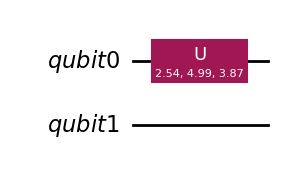

In [128]:
random_gate = UGate( 
    theta = random.random() * 2 * pi, 
    phi = random.random() * 2 * pi, 
    lam = random.random() * 2 * pi
)

random_gate.to_matrix()

circuit.append(random_gate, qubit0)
circuit.draw('mpl')

Let's add the Bell circuit and measurement gates from Problem 1.

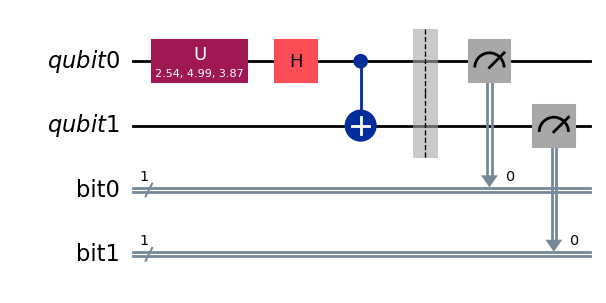

In [130]:
bit0 = ClassicalRegister(1, "bit0")
bit1 = ClassicalRegister(1, "bit1")
bits = QuantumCircuit(bit0, bit1) # Initializing Empty Circuit with 2 Bits
                            

circuit = circuit.compose(bell_circuit) # Adding the Bell Circuit
circuit = circuit.compose(bits) # Adding the two bits to measure onto 
circuit.barrier()

circuit.measure(qubit0, bit0)
circuit.measure(qubit1, bit1)


circuit.draw('mpl')

Now let's run `AerSimulator()` and display a histogram of the results

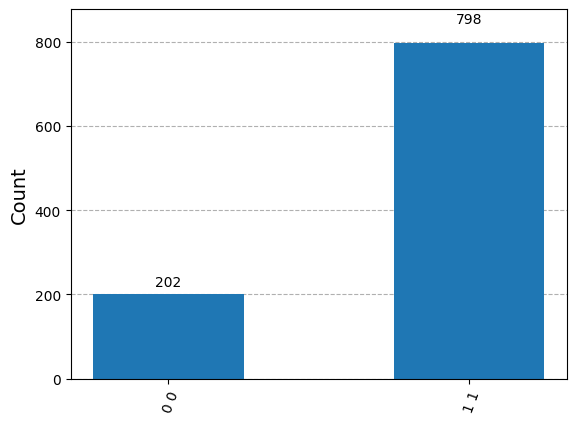

In [94]:
job = AerSimulator().run(circuit, shots = 1000) # 1000 samples
results = job.result()
statistics = results.get_counts()

plot_histogram(statistics)

If I generate a different unitary gate and re-run the `AerSimulator()`, 

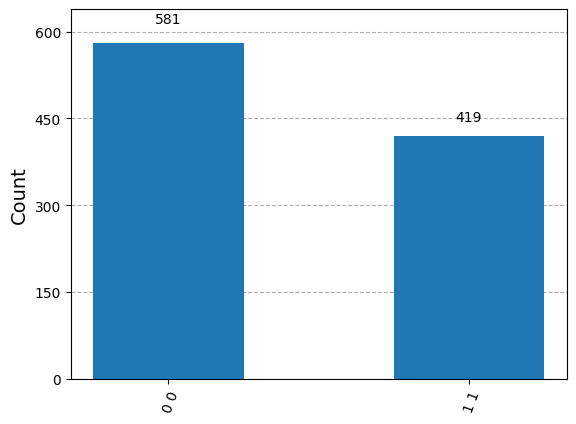

In [131]:
job = AerSimulator().run(circuit, shots = 1000) # 
results = job.result()
statistics = results.get_counts()

plot_histogram(statistics)

I get something completely different! 